In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import random
from tqdm import tqdm
import networkx as nx
import numpy as np
import pickle
from glob import glob
from pathlib import Path

HOME_DIR = Path.cwd()
while not (HOME_DIR / "src").exists() and HOME_DIR != HOME_DIR.parent:
    HOME_DIR = HOME_DIR.parent


SRC_DIR = HOME_DIR / "src"
if str(SRC_DIR) not in sys.path:
    sys.path.insert(0, str(SRC_DIR))

from graph_creator.utilities import make_node_edge_df
from subgraphs.SubgraphIsomorphismChecker import IsomorphicGrapCoverageCounter
from graph_creator.ActorGraph import ActorType

from subgraphs.subgraph_types import get_all_subgraphs, get_simple_patterns, get_complex_patterns
from subgraphs.SubgraphExtractor import SubgraphExtractor

PLOTS_DIR = HOME_DIR / "article" / "plots"
COVERAGE_HOLES_DIR = HOME_DIR / "coverage_holes"
DATA_CACHE_DIR = HOME_DIR / "data" / "cache"
PLOTS_DIR.mkdir(parents=True, exist_ok=True)
COVERAGE_HOLES_DIR.mkdir(parents=True, exist_ok=True)
DATA_CACHE_DIR.mkdir(parents=True, exist_ok=True)



In [7]:
graph_setting = '1_50_50_10_20_20_4_4_4'
carla_graph_dir = f'carla_actor_graph_setting_{graph_setting}'
argoverse_graph_dir = f'argoverse_actor_graph_setting_{graph_setting}'

ACTOR_GRAPHS_DIR = Path("/mnt/ssd_data/graph_coverage") / "actor_graphs"
carla_components_dir = ACTOR_GRAPHS_DIR / f"{carla_graph_dir}_components_nx"
argo_components_dir = ACTOR_GRAPHS_DIR /  f"{argoverse_graph_dir}_components_nx"

assert carla_components_dir.exists(), f"CARLA components directory not found: {carla_components_dir}"
assert argo_components_dir.exists(), f"Argoverse components directory not found: {argo_components_dir}"

graph_paths_carla_components = [str(p) for p in carla_components_dir.glob("*.pkl")]
graph_paths_argo_components = [str(p) for p in argo_components_dir.glob("*.pkl")]

## Subgraph Patterns

In [8]:
coverage_graphs = get_all_subgraphs()


In [9]:
cache_file_carla = DATA_CACHE_DIR / "carla_coverage_data.pkl"

if cache_file_carla.exists():
    cov_data_df_carla = pd.read_pickle(cache_file_carla)
    print(f"Loaded cached CARLA coverage data: {len(cov_data_df_carla)} graphs")
else:
    isom_cov_counter_carla = IsomorphicGrapCoverageCounter(
        coverage_graphs, 
        graph_paths_carla_components[:], 
        node_match=["actor_type", "lane_change", "is_on_intersection"], 
        edge_match=["edge_type"]
    )
    isom_cov_counter_carla.count_isomorphic_graphs()
    cov_data_df_carla = isom_cov_counter_carla.cov_data_df
    cov_data_df_carla.to_pickle(cache_file_carla)
    print(f"Computed and cached CARLA coverage data: {len(cov_data_df_carla)} graphs")

cov_data_df_carla.head(10)

Checking isomorphic graphs: 100%|██████████| 202371/202371 [17:20<00:00, 194.49it/s]


Computed and cached CARLA coverage data: 202371 graphs


,simple_following,simple_opposite,simple_neighbor,lead_vehicle_in_front_with_neighbor_vehicle_intersection,cut_in,cut_in_intersection,platoon_with_intersection,opposite_traffic_at_intersection,lead_with_neighbor_at_intersection,triple_opposite_traffic_intersection,...,cut_out,cut_out_intersection,four_vehicle_intersection_platoon,four_vehicle_opposite_intersection,lead_neighbor_opposite_vehicle,lead_neighbor_opposite_vehicle_intersection,degree,density,diameter,path
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,2.000000,1.000000,1,/mnt/ssd_data/graph_coverage/actor_graphs/carl...
1,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,2.000000,1.000000,1,/mnt/ssd_data/graph_coverage/actor_graphs/carl...
2,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,2.666667,0.666667,2,/mnt/ssd_data/graph_coverage/actor_graphs/carl...
3,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,2.000000,1.000000,1,/mnt/ssd_data/graph_coverage/actor_graphs/carl...
4,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,2.000000,1.000000,1,/mnt/ssd_data/graph_coverage/actor_graphs/carl...
5,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,3.200000,0.400000,3,/mnt/ssd_data/graph_coverage/actor_graphs/carl...
6,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,2.000000,1.000000,1,/mnt/ssd_data/graph_coverage/actor_graphs/carl...
7,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,2.000000,1.000000,1,/mnt/ssd_data/graph_coverage/actor_graphs/carl...
8,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,2.666667,0.666667,2,/mnt/ssd_data/graph_coverage/actor_graphs/carl...
9,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,2.000000,1.000000,1,/mnt/ssd_data/graph_coverage/actor_graphs/carl...


In [10]:
cache_file_argo = DATA_CACHE_DIR / "argoverse_coverage_data.pkl"

if cache_file_argo.exists():
    cov_data_df_argo = pd.read_pickle(cache_file_argo)
    print(f"Loaded cached Argoverse coverage data: {len(cov_data_df_argo)} graphs")
else:
    isom_cov_counter_argo = IsomorphicGrapCoverageCounter(
        coverage_graphs, 
        graph_paths_argo_components[:], 
        node_match=["actor_type", "lane_change", "is_on_intersection"], 
        edge_match=["edge_type"]
    )
    isom_cov_counter_argo.count_isomorphic_graphs()
    cov_data_df_argo = isom_cov_counter_argo.cov_data_df
    cov_data_df_argo.to_pickle(cache_file_argo)
    print(f"Computed and cached Argoverse coverage data: {len(cov_data_df_argo)} graphs")

cov_data_df_argo.head(5)

Checking isomorphic graphs: 100%|██████████| 284752/284752 [27:02<00:00, 175.49it/s]


Computed and cached Argoverse coverage data: 284752 graphs


,simple_following,simple_opposite,simple_neighbor,lead_vehicle_in_front_with_neighbor_vehicle_intersection,cut_in,cut_in_intersection,platoon_with_intersection,opposite_traffic_at_intersection,lead_with_neighbor_at_intersection,triple_opposite_traffic_intersection,...,cut_out,cut_out_intersection,four_vehicle_intersection_platoon,four_vehicle_opposite_intersection,lead_neighbor_opposite_vehicle,lead_neighbor_opposite_vehicle_intersection,degree,density,diameter,path
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,2.0,1.0,1,/mnt/ssd_data/graph_coverage/actor_graphs/argo...
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,2.0,1.0,1,/mnt/ssd_data/graph_coverage/actor_graphs/argo...
2,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,3.2,0.4,3,/mnt/ssd_data/graph_coverage/actor_graphs/argo...
3,True,True,True,False,False,False,False,True,True,False,...,False,False,False,True,False,False,3.2,0.4,3,/mnt/ssd_data/graph_coverage/actor_graphs/argo...
4,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,3.0,0.5,3,/mnt/ssd_data/graph_coverage/actor_graphs/argo...


## Coverage Metrics


In [11]:
def calculate_coverage_metrics(cov_df, dataset_name):
    subgraph_cols = [col for col in cov_df.columns if col not in ['degree', 'density', 'diameter', 'path']]
    absolute_coverage = cov_df[subgraph_cols].sum()
    relative_coverage = (cov_df[subgraph_cols].sum() / len(cov_df)) * 100
    
    coverage_df = pd.DataFrame({
        'subgraph': subgraph_cols,
        'absolute_count': absolute_coverage.values,
        'relative_percentage': relative_coverage.values
    })
    return coverage_df.sort_values('absolute_count', ascending=False)

coverage_carla = calculate_coverage_metrics(cov_data_df_carla, "CARLA")
coverage_argo = calculate_coverage_metrics(cov_data_df_argo, "ARGOVERSE")


## Dataset Comparison


In [12]:
comparison_df = pd.merge(
    coverage_carla[['subgraph', 'absolute_count', 'relative_percentage']],
    coverage_argo[['subgraph', 'absolute_count', 'relative_percentage']],
    on='subgraph',
    suffixes=('_carla', '_argo')
)

comparison_df['abs_diff'] = comparison_df['absolute_count_carla'] - comparison_df['absolute_count_argo']
comparison_df['rel_diff'] = comparison_df['relative_percentage_carla'] - comparison_df['relative_percentage_argo']

threshold_rare = 1.0
comparison_df['hole_in_carla'] = comparison_df['relative_percentage_carla'] < threshold_rare
comparison_df['hole_in_argo'] = comparison_df['relative_percentage_argo'] < threshold_rare

comparison_df


,subgraph,absolute_count_carla,relative_percentage_carla,absolute_count_argo,relative_percentage_argo,abs_diff,rel_diff,hole_in_carla,hole_in_argo
0,simple_following,168659,83.341487,215149,75.556625,-46490,7.784862,False,False
1,simple_opposite,168659,83.341487,215149,75.556625,-46490,7.784862,False,False
2,simple_neighbor,168659,83.341487,215149,75.556625,-46490,7.784862,False,False
3,lead_vehicle_in_front_with_neighbor_vehicle,84321,41.666543,134770,47.328904,-50449,-5.662361,False,False
4,lead_vehicle_in_front_following_vehicle_in_the...,84321,41.666543,134770,47.328904,-50449,-5.662361,False,False
5,opposite_traffic_at_intersection,24861,12.284863,92196,32.377648,-67335,-20.092785,False,False
6,lead_with_neighbor_at_intersection,24861,12.284863,92196,32.377648,-67335,-20.092785,False,False
7,platoon_with_intersection,12189,6.023096,40697,14.292086,-28508,-8.268990,False,False
8,triple_opposite_traffic_intersection,12189,6.023096,40697,14.292086,-28508,-8.268990,False,False
9,four_vehicle_intersection_platoon,9797,4.841109,35462,12.453644,-25665,-7.612535,False,False


## Visualizations


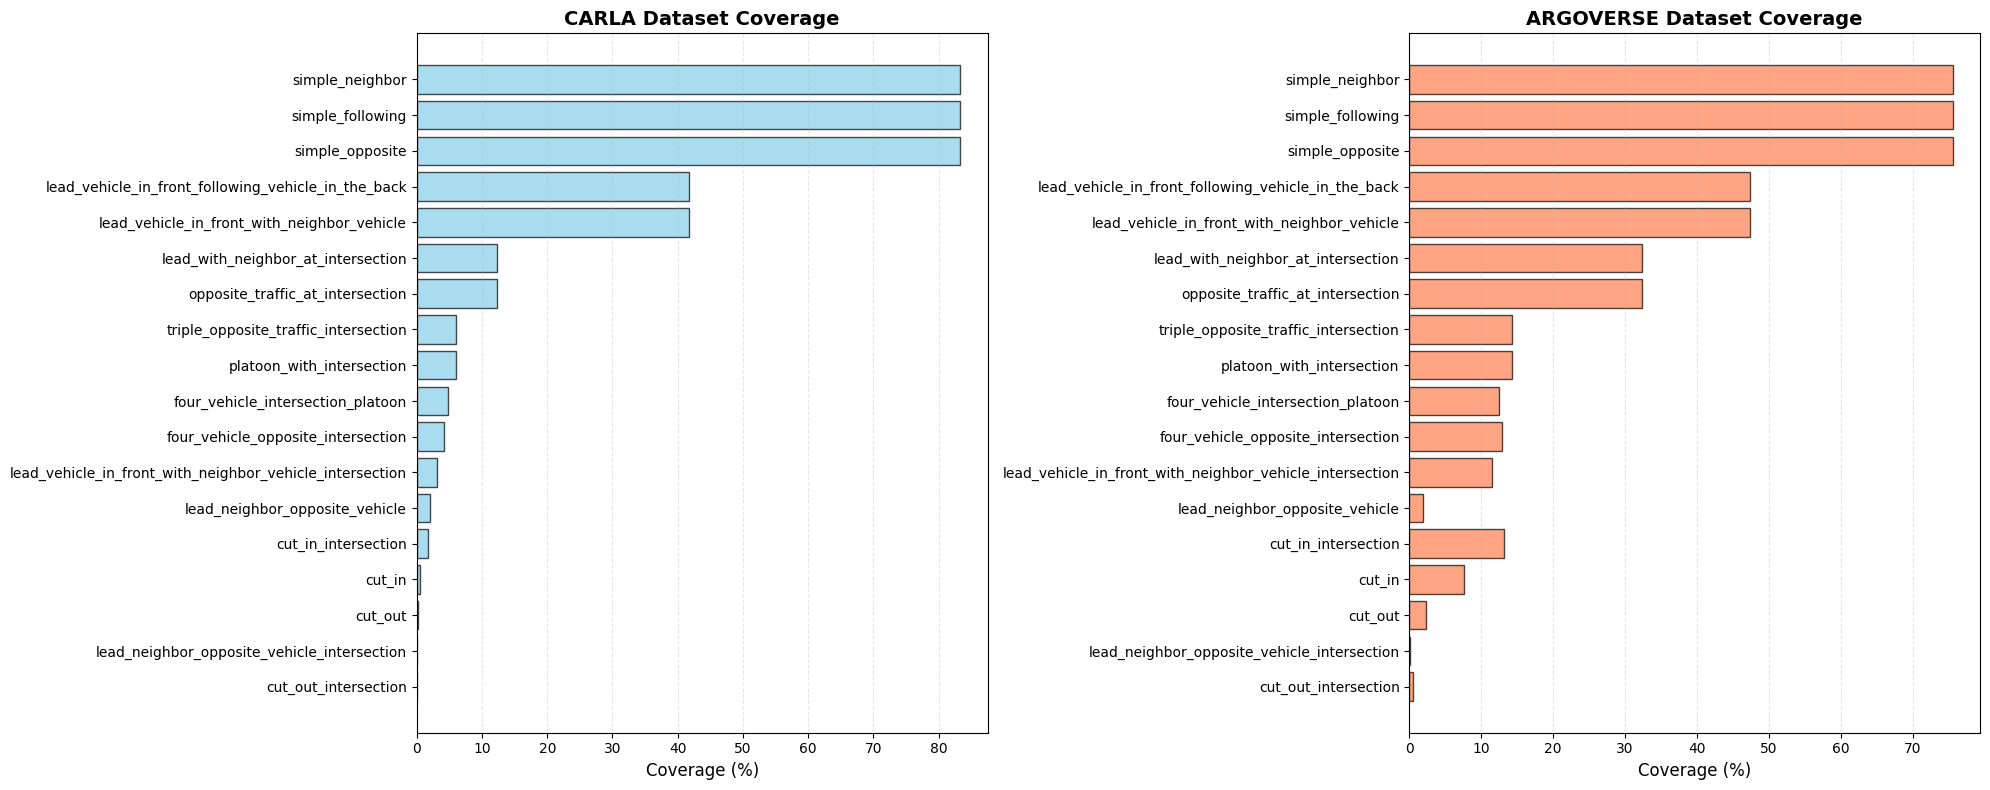

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
comparison_sorted = comparison_df.sort_values('relative_percentage_carla', ascending=True)

axes[0].barh(comparison_sorted['subgraph'], comparison_sorted['relative_percentage_carla'], 
             color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Coverage (%)', fontsize=12)
axes[0].set_title('CARLA Dataset Coverage', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3, linestyle='--')

axes[1].barh(comparison_sorted['subgraph'], comparison_sorted['relative_percentage_argo'], 
             color='coral', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Coverage (%)', fontsize=12)
axes[1].set_title('ARGOVERSE Dataset Coverage', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig(PLOTS_DIR / 'coverage_comparison_side_by_side.png', dpi=300, bbox_inches='tight')
plt.show()


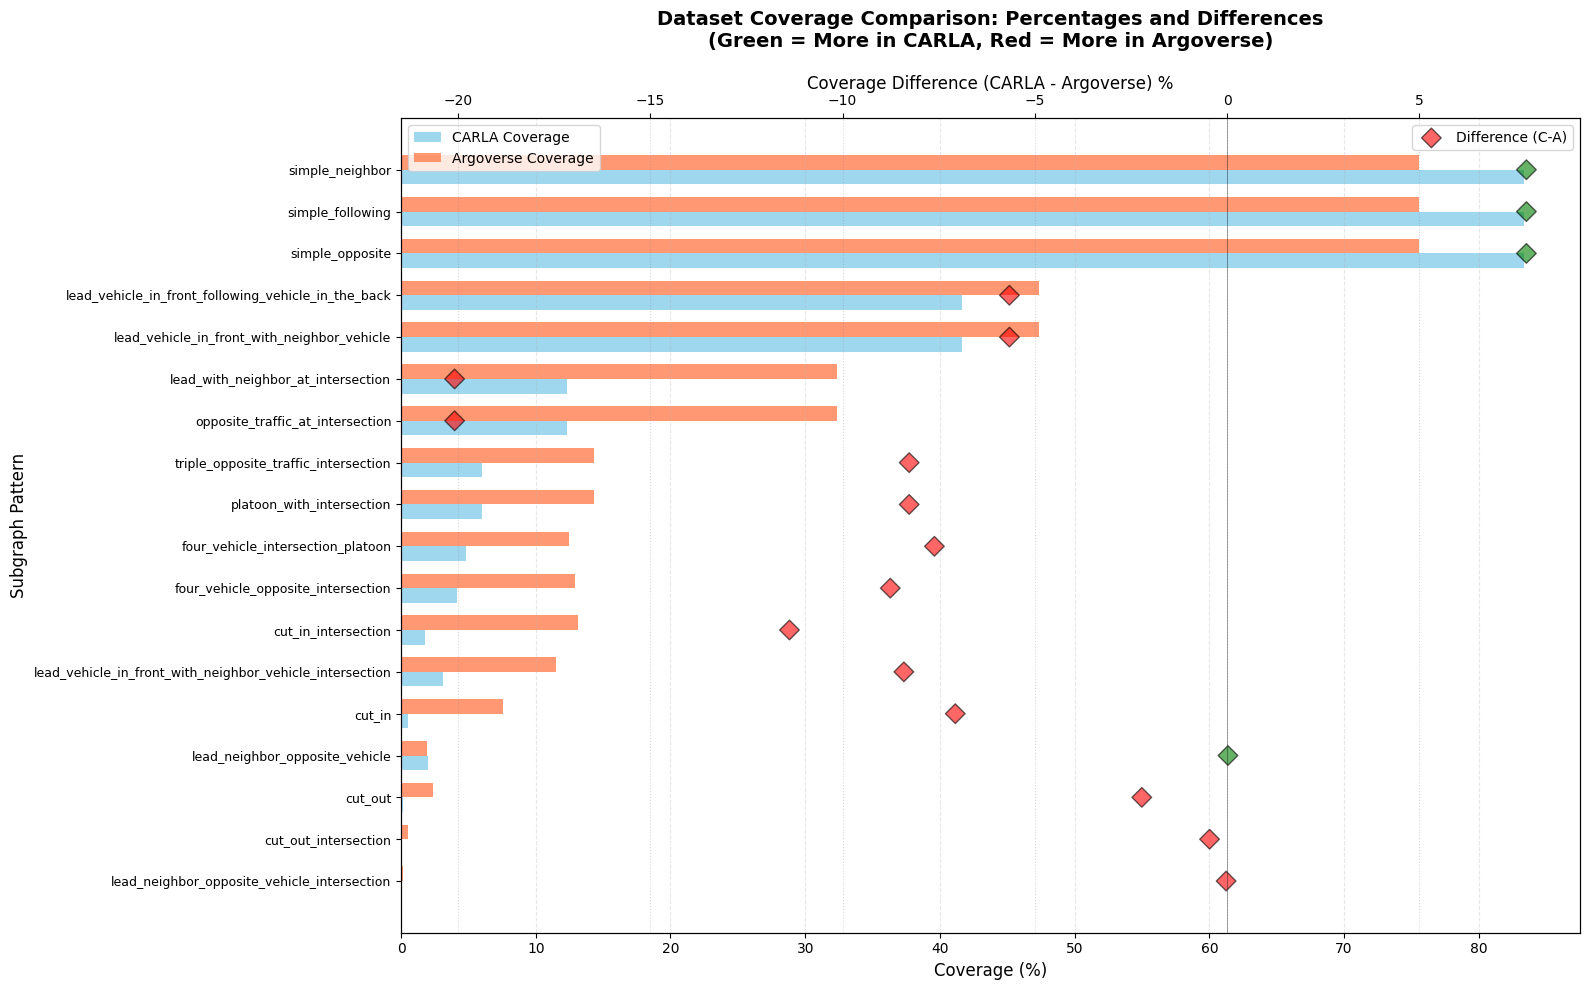

In [14]:
fig, ax1 = plt.subplots(figsize=(16, 10))

comparison_sorted = comparison_df.copy()
comparison_sorted['avg_coverage'] = (comparison_sorted['relative_percentage_carla'] + comparison_sorted['relative_percentage_argo']) / 2
comparison_sorted = comparison_sorted.sort_values('avg_coverage', ascending=True)

x_pos = np.arange(len(comparison_sorted))
width = 0.35

ax1.barh(x_pos - width/2, comparison_sorted['relative_percentage_carla'], 
         width, label='CARLA Coverage', color='skyblue', alpha=0.8)
ax1.barh(x_pos + width/2, comparison_sorted['relative_percentage_argo'], 
         width, label='Argoverse Coverage', color='coral', alpha=0.8)

ax1.set_xlabel('Coverage (%)', fontsize=12)
ax1.set_ylabel('Subgraph Pattern', fontsize=12)
ax1.set_yticks(x_pos)
ax1.set_yticklabels(comparison_sorted['subgraph'], fontsize=9)
ax1.tick_params(axis='y', labelsize=9)
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(axis='x', alpha=0.3, linestyle='--')

ax2 = ax1.twiny()
colors = ['green' if x > 0 else 'red' for x in comparison_sorted['rel_diff']]
ax2.scatter(comparison_sorted['rel_diff'], x_pos, 
           c=colors, s=100, alpha=0.6, marker='D', 
           label='Difference (C-A)', edgecolors='black', linewidths=1)

ax2.axvline(x=0, color='black', linestyle='-', linewidth=0.5, alpha=0.5)
ax2.set_xlabel('Coverage Difference (CARLA - Argoverse) %', fontsize=12)
ax2.legend(loc='upper right', fontsize=10)
ax2.grid(axis='x', alpha=0.3, linestyle=':', color='gray')

plt.title('Dataset Coverage Comparison: Percentages and Differences\n(Green = More in CARLA, Red = More in Argoverse)', 
         fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig(PLOTS_DIR / 'coverage_comparison_dual_axis.png', dpi=300, bbox_inches='tight')
plt.show()


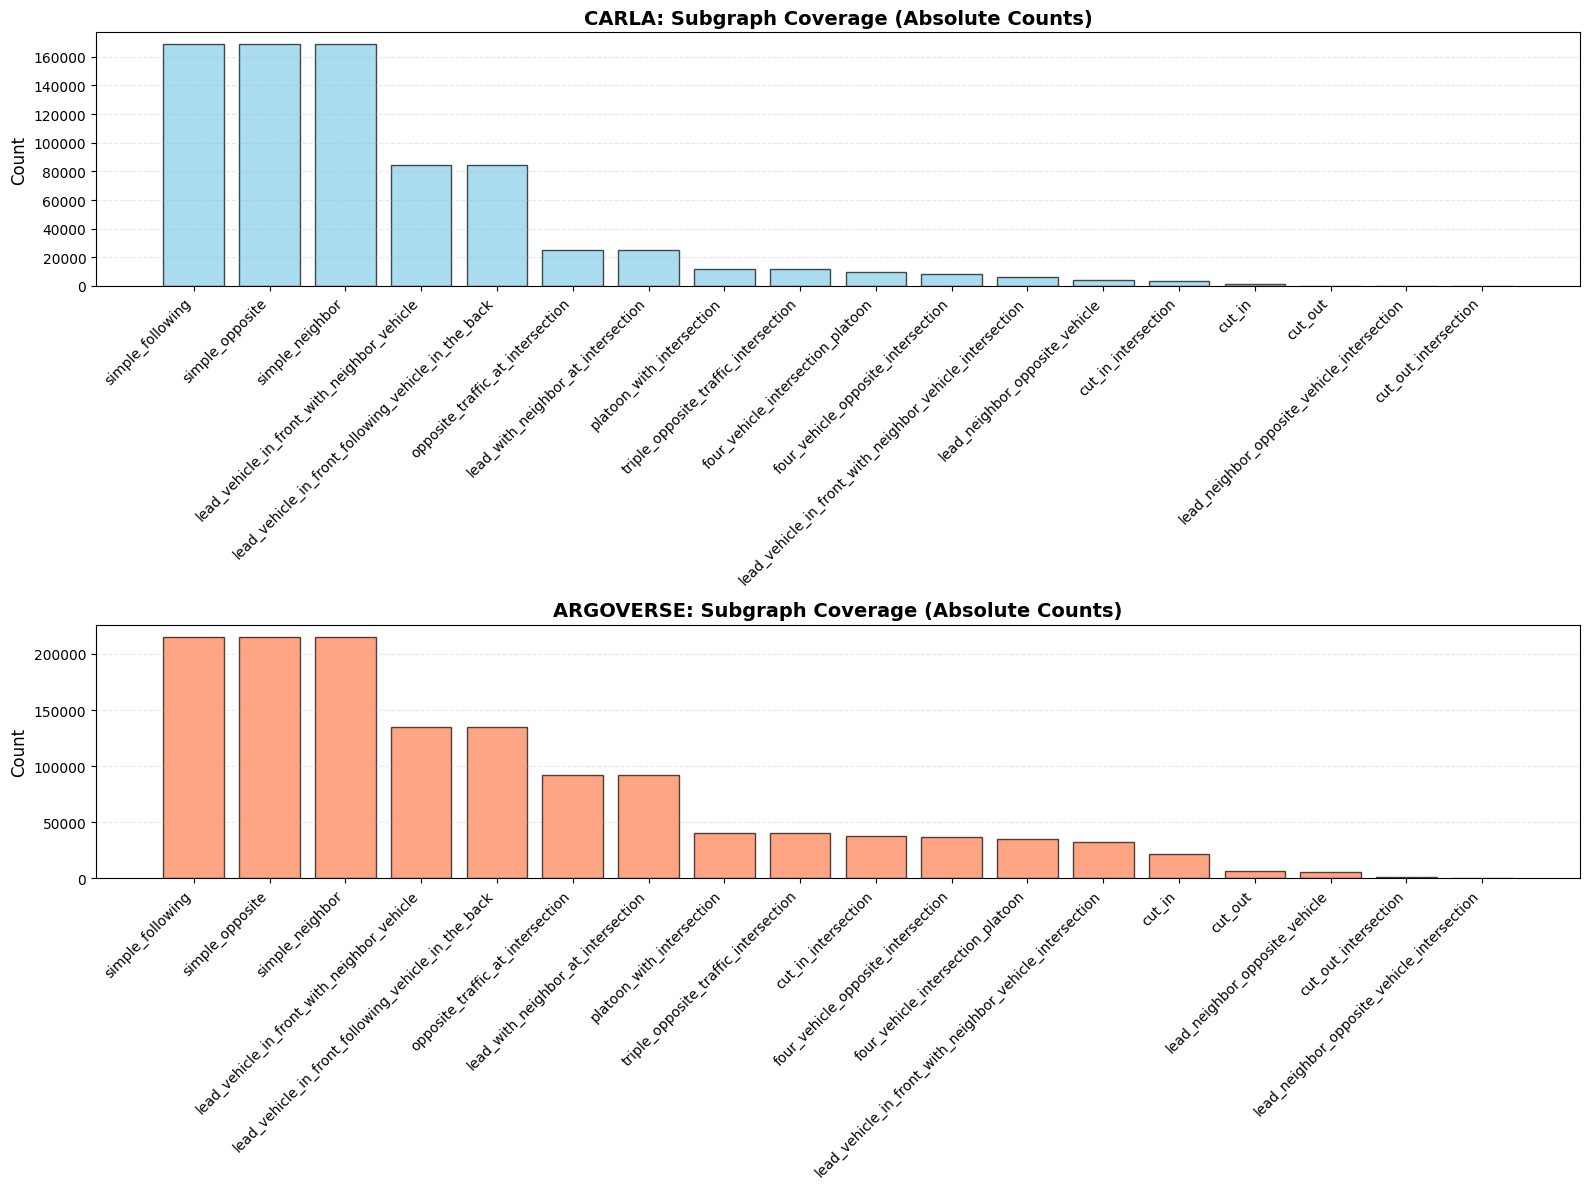

In [15]:
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

barchart_df_carla = cov_data_df_carla[coverage_graphs.keys()].sum().reset_index().rename(columns={"index":"scenario", 0: "count"})
barchart_df_carla = barchart_df_carla.sort_values('count', ascending=False)
axes[0].bar(range(len(barchart_df_carla)), barchart_df_carla['count'], 
            color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_xticks(range(len(barchart_df_carla)))
axes[0].set_xticklabels(barchart_df_carla['scenario'], rotation=45, ha='right')
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('CARLA: Subgraph Coverage (Absolute Counts)', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

barchart_df_argo = cov_data_df_argo[coverage_graphs.keys()].sum().reset_index().rename(columns={"index":"scenario", 0: "count"})
barchart_df_argo = barchart_df_argo.sort_values('count', ascending=False)
axes[1].bar(range(len(barchart_df_argo)), barchart_df_argo['count'], 
            color='coral', edgecolor='black', alpha=0.7)
axes[1].set_xticks(range(len(barchart_df_argo)))
axes[1].set_xticklabels(barchart_df_argo['scenario'], rotation=45, ha='right')
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_title('ARGOVERSE: Subgraph Coverage (Absolute Counts)', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig(PLOTS_DIR / 'subgraph_coverage_barcharts.png', dpi=300, bbox_inches='tight')
plt.show()

## Speed and Path Analysis


In [16]:
def extract_scenario_data_with_roles(cov_df, scenario_name, scenario_pattern, node_match_attrs, edge_match_attrs, max_samples=500):
    scenario_graph_paths = cov_df[cov_df[scenario_name]].path.to_list()
    
    if len(scenario_graph_paths) > max_samples:
        scenario_graph_paths = random.sample(scenario_graph_paths, max_samples)
    
    node_dfs = []
    edge_dfs = []
    
    for graph_path in tqdm(scenario_graph_paths, desc=f"Loading {scenario_name}"):
        try:
            with open(graph_path, "rb") as file:
                ag_nx = pickle.load(file)
            
            GM = nx.algorithms.isomorphism.DiGraphMatcher(
                ag_nx, scenario_pattern,
                node_match=nx.algorithms.isomorphism.categorical_node_match(node_match_attrs, [None] * len(node_match_attrs)),
                edge_match=nx.algorithms.isomorphism.categorical_edge_match(edge_match_attrs, [None] * len(edge_match_attrs))
            )
            
            mapping = None
            for m in GM.subgraph_isomorphisms_iter():
                mapping = m
                break
            
            if mapping is None:
                continue
            
            node_to_role = {main_node: pattern_node for main_node, pattern_node in mapping.items()}
            node_df, edge_df = make_node_edge_df(ag_nx)
            
            node_df["role"] = node_df["node_id"].map(node_to_role)
            node_df["role"] = node_df["role"].fillna("other")
            
            node_df["path"] = graph_path
            edge_df["path"] = graph_path
            node_df["scenario"] = scenario_name
            edge_df["scenario"] = scenario_name
            
            node_dfs.append(node_df)
            edge_dfs.append(edge_df)
        except Exception as e:
            continue
    
    if len(node_dfs) == 0:
        return None, None
    
    return pd.concat(node_dfs, ignore_index=True), pd.concat(edge_dfs, ignore_index=True)


In [17]:
top_scenarios_carla = coverage_carla[coverage_carla['relative_percentage'] >= 5.0]['subgraph'].head(10).tolist()
top_scenarios_argo = coverage_argo[coverage_argo['relative_percentage'] >= 5.0]['subgraph'].head(10).tolist()

node_match_attrs = ["actor_type", "lane_change", "is_on_intersection"]
edge_match_attrs = ["edge_type"]

carla_scenario_nodes = []
carla_scenario_edges = []

for scenario in top_scenarios_carla[:3]:
    scenario_pattern = coverage_graphs[scenario]
    node_df, edge_df = extract_scenario_data_with_roles(
        cov_data_df_carla, scenario, scenario_pattern, 
        node_match_attrs, edge_match_attrs, max_samples=10000
    )
    if node_df is not None:
        carla_scenario_nodes.append(node_df)
        carla_scenario_edges.append(edge_df)

if len(carla_scenario_nodes) > 0:
    carla_all_nodes = pd.concat(carla_scenario_nodes, ignore_index=True)
    carla_all_edges = pd.concat(carla_scenario_edges, ignore_index=True)

argo_scenario_nodes = []
argo_scenario_edges = []

for scenario in top_scenarios_argo[:3]:
    scenario_pattern = coverage_graphs[scenario]
    node_df, edge_df = extract_scenario_data_with_roles(
        cov_data_df_argo, scenario, scenario_pattern,
        node_match_attrs, edge_match_attrs, max_samples=10000
    )
    if node_df is not None:
        argo_scenario_nodes.append(node_df)
        argo_scenario_edges.append(edge_df)

if len(argo_scenario_nodes) > 0:
    argo_all_nodes = pd.concat(argo_scenario_nodes, ignore_index=True)
    argo_all_edges = pd.concat(argo_scenario_edges, ignore_index=True)


Loading simple_neighbor: 100%|██████████| 10000/10000 [00:51<00:00, 193.91it/s]


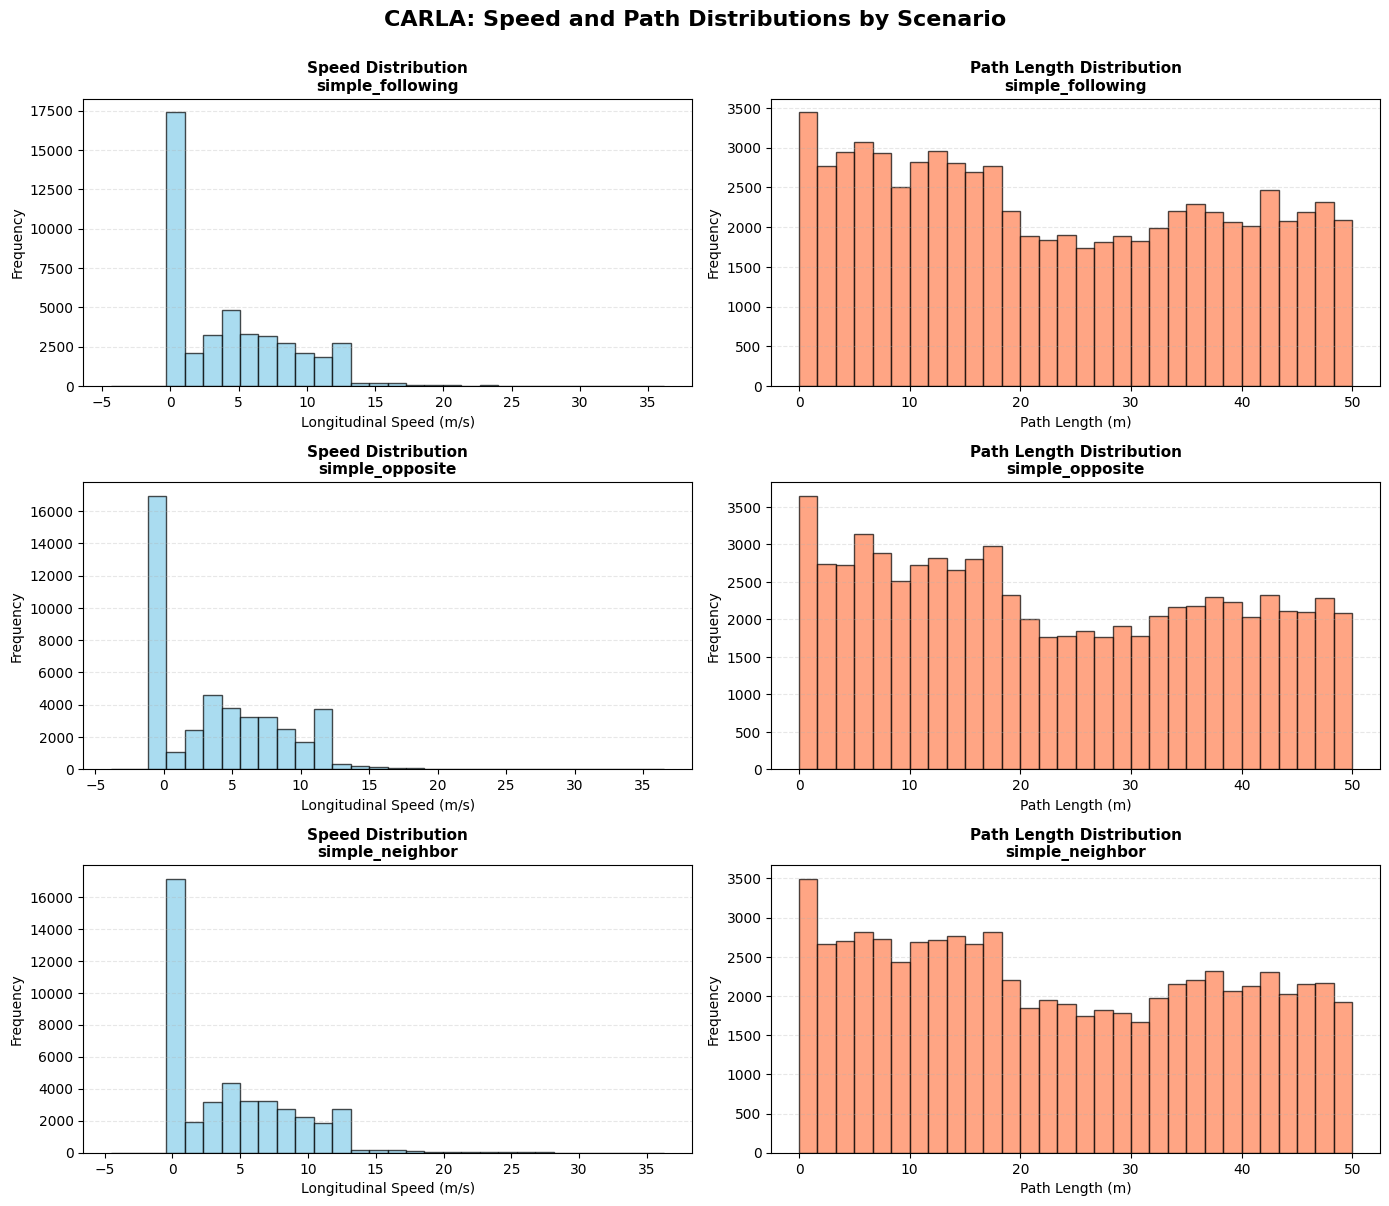

In [18]:
if len(carla_scenario_nodes) > 0:
    n_scenarios = len(carla_scenario_nodes)
    fig, axes = plt.subplots(n_scenarios, 2, figsize=(14, 4*n_scenarios))
    
    if n_scenarios == 1:
        axes = axes.reshape(1, -1)
    
    for idx, (node_df, edge_df) in enumerate(zip(carla_scenario_nodes, carla_scenario_edges)):
        scenario_name = node_df['scenario'].iloc[0]
        
        # Speed distribution
        axes[idx, 0].hist(node_df['lon_speed'], bins=30, color='skyblue', 
                         edgecolor='black', alpha=0.7)
        axes[idx, 0].set_xlabel('Longitudinal Speed (m/s)', fontsize=10)
        axes[idx, 0].set_ylabel('Frequency', fontsize=10)
        axes[idx, 0].set_title(f'Speed Distribution\n{scenario_name}', 
                               fontsize=11, fontweight='bold')
        axes[idx, 0].grid(axis='y', alpha=0.3, linestyle='--')
        
        # Path length distribution
        axes[idx, 1].hist(edge_df['path_length'].abs(), bins=30, color='coral', 
                         edgecolor='black', alpha=0.7)
        axes[idx, 1].set_xlabel('Path Length (m)', fontsize=10)
        axes[idx, 1].set_ylabel('Frequency', fontsize=10)
        axes[idx, 1].set_title(f'Path Length Distribution\n{scenario_name}', 
                               fontsize=11, fontweight='bold')
        axes[idx, 1].grid(axis='y', alpha=0.3, linestyle='--')
    
    plt.suptitle('CARLA: Speed and Path Distributions by Scenario', 
                 fontsize=16, fontweight='bold', y=1.001)
    plt.tight_layout()
    plt.savefig(PLOTS_DIR / 'carla_speed_path_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()


TODO: Why are there negative paths length? 

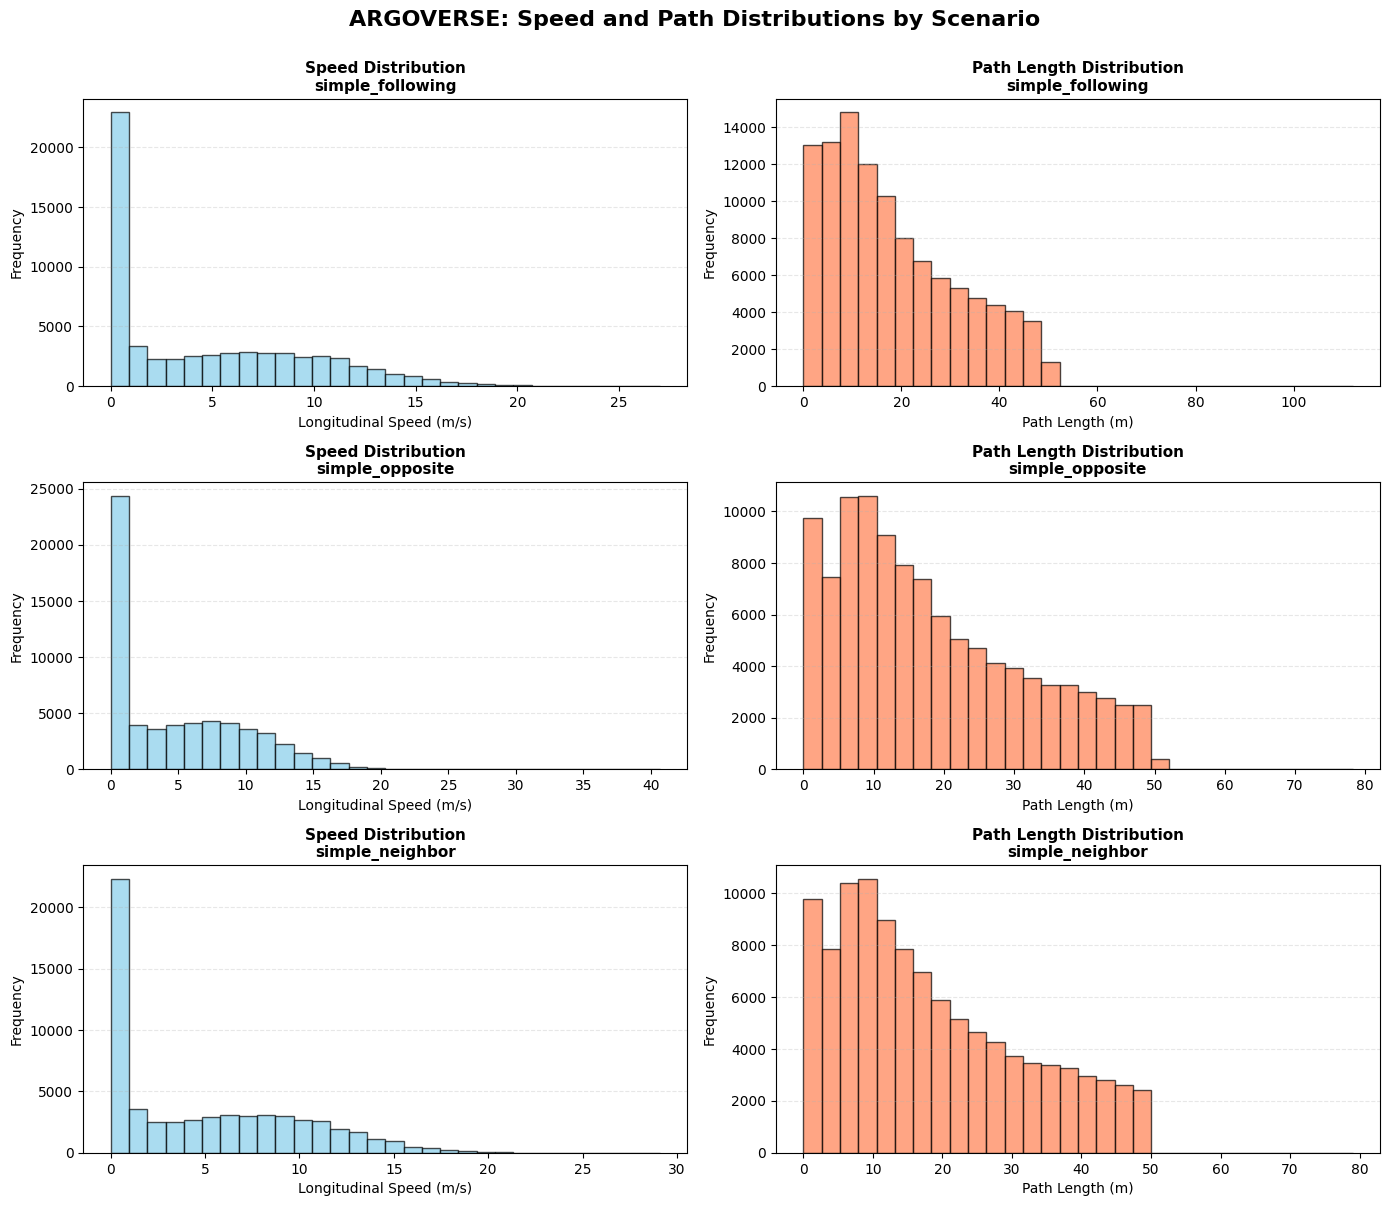

In [19]:
if len(argo_scenario_nodes) > 0:
    n_scenarios = len(argo_scenario_nodes)
    fig, axes = plt.subplots(n_scenarios, 2, figsize=(14, 4*n_scenarios))
    
    if n_scenarios == 1:
        axes = axes.reshape(1, -1)
    
    for idx, (node_df, edge_df) in enumerate(zip(argo_scenario_nodes, argo_scenario_edges)):
        scenario_name = node_df['scenario'].iloc[0]
        
        # Speed distribution
        axes[idx, 0].hist(node_df['lon_speed'], bins=30, color='skyblue', 
                         edgecolor='black', alpha=0.7)
        axes[idx, 0].set_xlabel('Longitudinal Speed (m/s)', fontsize=10)
        axes[idx, 0].set_ylabel('Frequency', fontsize=10)
        axes[idx, 0].set_title(f'Speed Distribution\n{scenario_name}', 
                               fontsize=11, fontweight='bold')
        axes[idx, 0].grid(axis='y', alpha=0.3, linestyle='--')
        
        # Path length distribution
        axes[idx, 1].hist(edge_df['path_length'].abs(), bins=30, color='coral', 
                         edgecolor='black', alpha=0.7)
        axes[idx, 1].set_xlabel('Path Length (m)', fontsize=10)
        axes[idx, 1].set_ylabel('Frequency', fontsize=10)
        axes[idx, 1].set_title(f'Path Length Distribution\n{scenario_name}', 
                               fontsize=11, fontweight='bold')
        axes[idx, 1].grid(axis='y', alpha=0.3, linestyle='--')
    
    plt.suptitle('ARGOVERSE: Speed and Path Distributions by Scenario', 
                 fontsize=16, fontweight='bold', y=1.001)
    plt.tight_layout()
    plt.savefig(PLOTS_DIR / 'argo_speed_path_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()


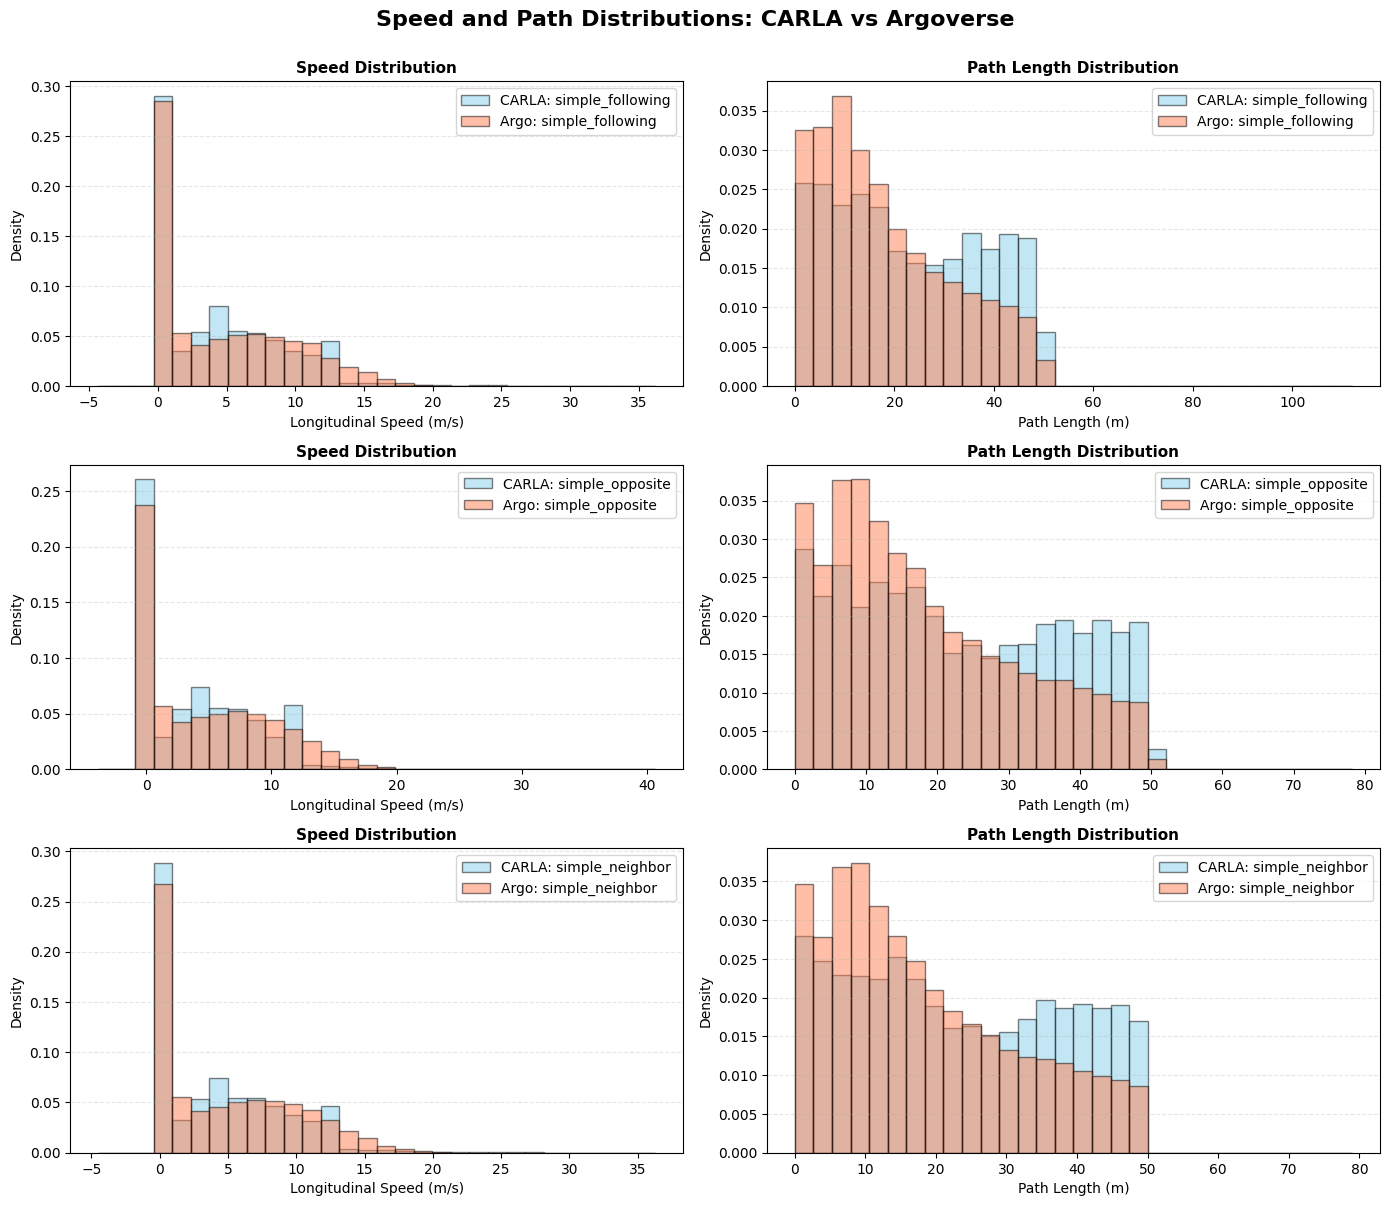

In [32]:
if len(carla_scenario_nodes) > 0 and len(argo_scenario_nodes) > 0:
    n_carla = len(carla_scenario_nodes)
    n_argo = len(argo_scenario_nodes)
    n_scenarios = max(n_carla, n_argo)
    fig, axes = plt.subplots(n_scenarios, 2, figsize=(14, 4*n_scenarios))
    
    if n_scenarios == 1:
        axes = axes.reshape(1, -1)
    
    for idx in range(n_scenarios):
        # Compute shared bins for speed
        speed_data = []
        if idx < n_carla:
            speed_data.append(carla_scenario_nodes[idx]['lon_speed'])
        if idx < n_argo:
            speed_data.append(argo_scenario_nodes[idx]['lon_speed'])
        combined_speed = pd.concat(speed_data)
        speed_bins = np.linspace(combined_speed.min(), combined_speed.max(), 31)
        
        # Compute shared bins for path length
        path_data = []
        if idx < n_carla:
            path_data.append(carla_scenario_edges[idx]['path_length'].abs())
        if idx < n_argo:
            path_data.append(argo_scenario_edges[idx]['path_length'].abs())
        combined_path = pd.concat(path_data)
        path_bins = np.linspace(combined_path.min(), combined_path.max(), 31)
        
        # Speed distribution
        if idx < n_carla:
            carla_scenario_name = carla_scenario_nodes[idx]['scenario'].iloc[0]
            axes[idx, 0].hist(carla_scenario_nodes[idx]['lon_speed'], bins=speed_bins,
                             color='skyblue', edgecolor='black', alpha=0.5,
                             density=True, label=f'CARLA: {carla_scenario_name}')
        if idx < n_argo:
            argo_scenario_name = argo_scenario_nodes[idx]['scenario'].iloc[0]
            axes[idx, 0].hist(argo_scenario_nodes[idx]['lon_speed'], bins=speed_bins,
                             color='coral', edgecolor='black', alpha=0.5,
                             density=True, label=f'Argo: {argo_scenario_name}')
        axes[idx, 0].set_xlabel('Longitudinal Speed (m/s)', fontsize=10)
        axes[idx, 0].set_ylabel('Density', fontsize=10)
        axes[idx, 0].set_title('Speed Distribution', fontsize=11, fontweight='bold')
        axes[idx, 0].grid(axis='y', alpha=0.3, linestyle='--')
        axes[idx, 0].legend()
        
        # Path length distribution
        if idx < n_carla:
            axes[idx, 1].hist(carla_scenario_edges[idx]['path_length'].abs(), bins=path_bins,
                             color='skyblue', edgecolor='black', alpha=0.5,
                             density=True, label=f'CARLA: {carla_scenario_name}')
        if idx < n_argo:
            axes[idx, 1].hist(argo_scenario_edges[idx]['path_length'].abs(), bins=path_bins,
                             color='coral', edgecolor='black', alpha=0.5,
                             density=True, label=f'Argo: {argo_scenario_name}')
        axes[idx, 1].set_xlabel('Path Length (m)', fontsize=10)
        axes[idx, 1].set_ylabel('Density', fontsize=10)
        axes[idx, 1].set_title('Path Length Distribution', fontsize=11, fontweight='bold')
        axes[idx, 1].grid(axis='y', alpha=0.3, linestyle='--')
        axes[idx, 1].legend()
    
    plt.suptitle('Speed and Path Distributions: CARLA vs Argoverse',
                 fontsize=16, fontweight='bold', y=1.001)
    plt.tight_layout()
    plt.savefig(PLOTS_DIR / 'combined_speed_path_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()


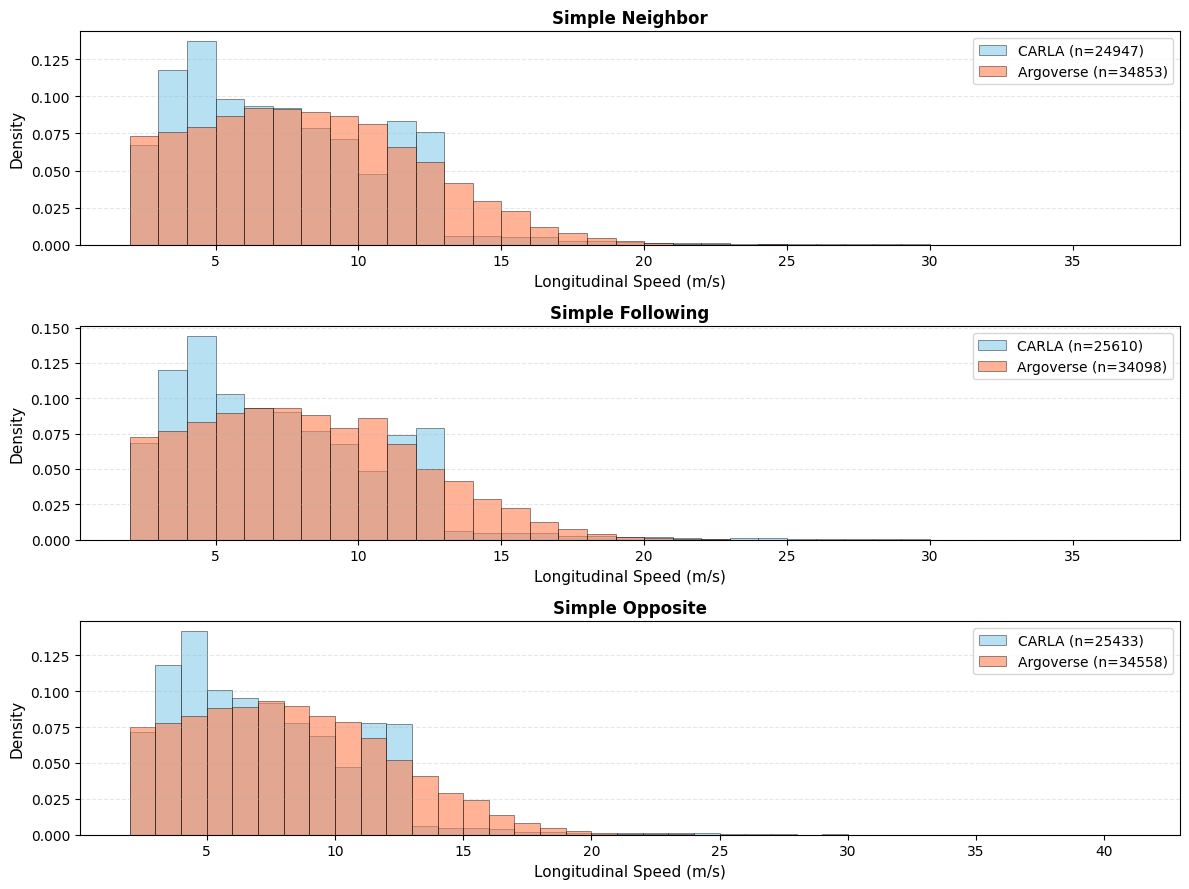

In [20]:
if len(carla_scenario_nodes) > 0 and len(argo_scenario_nodes) > 0:
    common_scenarios = list(set([df['scenario'].iloc[0] for df in carla_scenario_nodes]) & 
                           set([df['scenario'].iloc[0] for df in argo_scenario_nodes]))[:5]
    
    fig, axes = plt.subplots(len(common_scenarios), 1, figsize=(12, 3*len(common_scenarios)))
    if len(common_scenarios) == 1:
        axes = [axes]
    
    for idx, scenario in enumerate(common_scenarios):
        carla_nodes = pd.concat([df for df in carla_scenario_nodes if df['scenario'].iloc[0] == scenario])
        argo_nodes = pd.concat([df for df in argo_scenario_nodes if df['scenario'].iloc[0] == scenario])
        
        carla_speeds = carla_nodes[carla_nodes['lon_speed'] >= 2.0]['lon_speed']
        argo_speeds = argo_nodes[argo_nodes['lon_speed'] >= 2.0]['lon_speed']
        
        combined_max = max(carla_speeds.max(), argo_speeds.max())
        bin_edges = np.arange(2.0, combined_max + 1.0, 1.0)
        
        axes[idx].hist(carla_speeds, bins=bin_edges, alpha=0.6, label=f'CARLA (n={len(carla_speeds)})', 
                      color='skyblue', density=True, edgecolor='black', linewidth=0.5)
        axes[idx].hist(argo_speeds, bins=bin_edges, alpha=0.6, label=f'Argoverse (n={len(argo_speeds)})', 
                      color='coral', density=True, edgecolor='black', linewidth=0.5)
        
        axes[idx].set_xlabel('Longitudinal Speed (m/s)', fontsize=11)
        axes[idx].set_ylabel('Density', fontsize=11)
        axes[idx].set_title(f'{scenario.replace("_", " ").title()}', fontsize=12, fontweight='bold')
        axes[idx].legend(loc='upper right', fontsize=10)
        axes[idx].grid(axis='y', alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    plt.savefig(PLOTS_DIR / 'top5_scenarios_speed_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    


In [21]:
if len(carla_scenario_nodes) > 0 and len(argo_scenario_nodes) > 0:
    common_scenarios = set([df['scenario'].iloc[0] for df in carla_scenario_nodes]) & \
                      set([df['scenario'].iloc[0] for df in argo_scenario_nodes])


In [22]:
# Comparative analysis of path length distributions
if len(carla_scenario_edges) > 0 and len(argo_scenario_edges) > 0:
    common_scenarios = set([df['scenario'].iloc[0] for df in carla_scenario_edges]) & \
                      set([df['scenario'].iloc[0] for df in argo_scenario_edges])


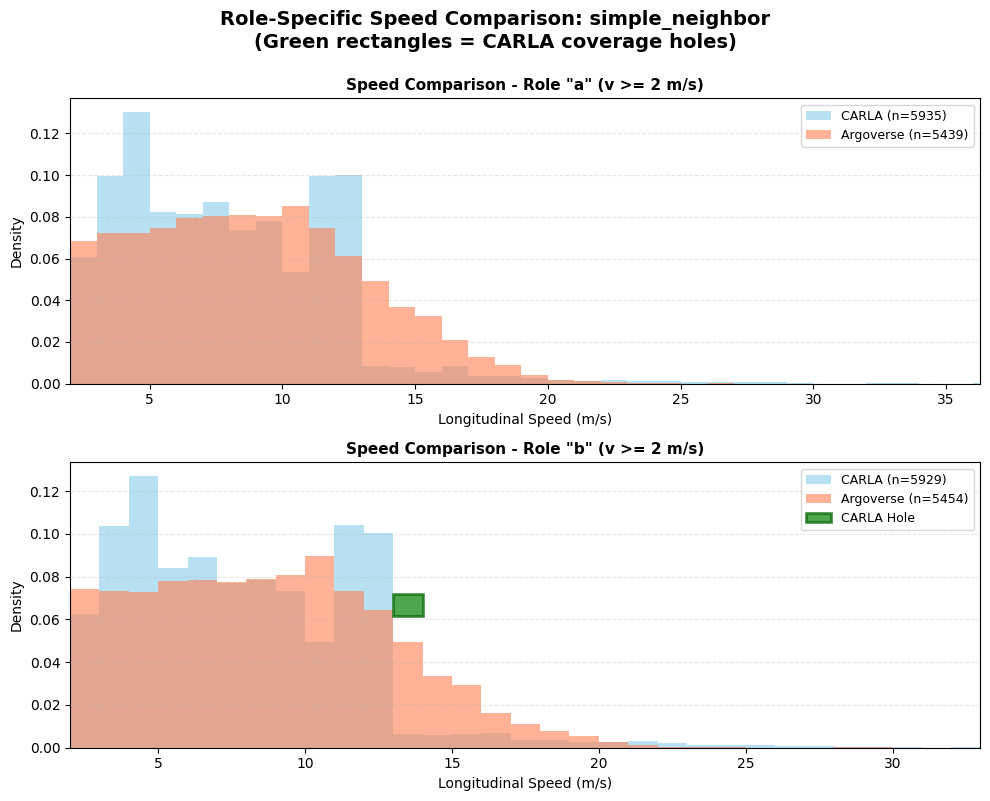

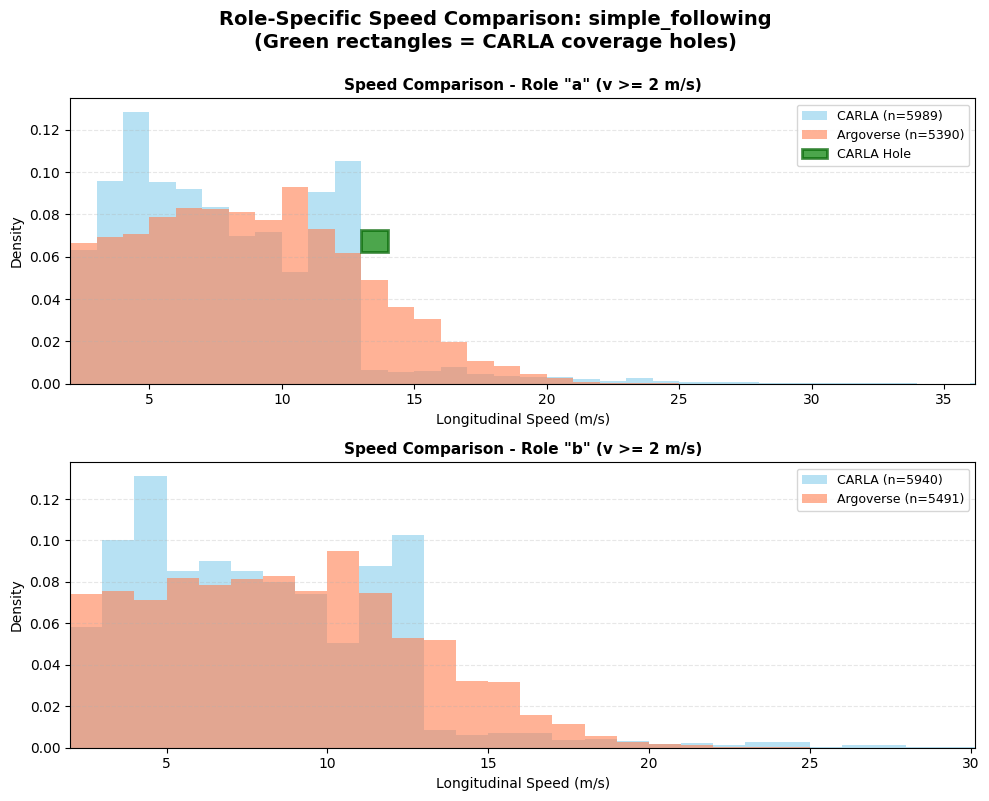

In [23]:
if len(carla_scenario_nodes) > 0 and len(argo_scenario_nodes) > 0:
    common_scenarios = list(set([df['scenario'].iloc[0] for df in carla_scenario_nodes]) & 
                           set([df['scenario'].iloc[0] for df in argo_scenario_nodes]))
    
    if len(common_scenarios) > 0:
        n_scenarios = min(len(common_scenarios), 2)
        
        for scenario in common_scenarios[:n_scenarios]:
            carla_node_data = [df for df in carla_scenario_nodes if df['scenario'].iloc[0] == scenario][0]
            argo_node_data = [df for df in argo_scenario_nodes if df['scenario'].iloc[0] == scenario][0]
            
            all_roles = sorted([r for r in carla_node_data['role'].unique() if r != 'other'])
            
            if len(all_roles) == 0:
                continue
            
            n_roles = len(all_roles)
            fig, axes = plt.subplots(n_roles, 1, figsize=(10, 4*n_roles))
            
            if n_roles == 1:
                axes = [axes]
            
            for role_idx, role in enumerate(all_roles):
                carla_role_data = carla_node_data[carla_node_data['role'] == role]
                argo_role_data = argo_node_data[argo_node_data['role'] == role]
                carla_speed = carla_role_data[carla_role_data['lon_speed'] >= 2.0]['lon_speed']
                argo_speed = argo_role_data[argo_role_data['lon_speed'] >= 2.0]['lon_speed']
                
                if len(carla_speed) == 0 or len(argo_speed) == 0:
                    axes[role_idx].text(0.5, 0.5, f'Insufficient data for role "{role}"', 
                                          ha='center', va='center', fontsize=12)
                    axes[role_idx].set_xlim(0, 1)
                    axes[role_idx].set_ylim(0, 1)
                    axes[role_idx].axis('off')
                else:
                    combined_max = max(carla_speed.max(), argo_speed.max())
                    bin_edges_speed = np.arange(2.0, combined_max + 1.0, 1.0)
                    combined_min = 2.0
                    
                    argo_hist, _ = np.histogram(argo_speed, bins=bin_edges_speed, density=True)
                    carla_hist, _ = np.histogram(carla_speed, bins=bin_edges_speed, density=True)
                    axes[role_idx].hist(carla_speed, bins=bin_edges_speed, alpha=0.6, 
                                          label=f'CARLA (n={len(carla_speed)})', color='skyblue', density=True)
                    axes[role_idx].hist(argo_speed, bins=bin_edges_speed, alpha=0.6, 
                                          label=f'Argoverse (n={len(argo_speed)})', color='coral', density=True)
                    
                    axes[role_idx].set_xlim(combined_min, combined_max)
                    ylim = axes[role_idx].get_ylim()
                    y_middle = ylim[1] * 0.5
                    rect_height = ylim[1] * 0.08
                    
                    high_threshold = 0.005
                    hole_added = False
                    for i in range(len(bin_edges_speed) - 1):
                        if argo_hist[i] >= high_threshold and carla_hist[i] < (argo_hist[i] * 0.15):
                            x_start = bin_edges_speed[i]
                            bin_width = bin_edges_speed[i+1] - bin_edges_speed[i]
                            
                            if not hole_added:
                                axes[role_idx].add_patch(plt.Rectangle((x_start, y_middle - rect_height/2),
                                                                         bin_width, rect_height,
                                                                         facecolor='green', edgecolor='darkgreen',
                                                                         alpha=0.7, linewidth=2,
                                                                         label='CARLA Hole', zorder=10))
                                hole_added = True
                            else:
                                axes[role_idx].add_patch(plt.Rectangle((x_start, y_middle - rect_height/2),
                                                                         bin_width, rect_height,
                                                                         facecolor='green', edgecolor='darkgreen',
                                                                         alpha=0.7, linewidth=2, zorder=10))
                    
                    axes[role_idx].set_xlabel('Longitudinal Speed (m/s)', fontsize=10)
                    axes[role_idx].set_ylabel('Density', fontsize=10)
                    axes[role_idx].set_title(f'Speed Comparison - Role "{role}" (v >= 2 m/s)', 
                                               fontsize=11, fontweight='bold')
                    axes[role_idx].legend(loc='best', fontsize=9)
                    axes[role_idx].grid(axis='y', alpha=0.3, linestyle='--')
            
            plt.suptitle(f'Role-Specific Speed Comparison: {scenario}\n(Green rectangles = CARLA coverage holes)', 
                         fontsize=14, fontweight='bold', y=0.995)
            plt.tight_layout()
            plt.savefig(PLOTS_DIR / f'role_comparison_{scenario.replace("/", "_")}.png', dpi=300, bbox_inches='tight')
            plt.show()


In [24]:
speed_holes_data = []
path_holes_data = []

if len(carla_scenario_nodes) > 0 and len(argo_scenario_nodes) > 0:
    common_scenarios = list(set([df['scenario'].iloc[0] for df in carla_scenario_nodes]) & 
                           set([df['scenario'].iloc[0] for df in argo_scenario_nodes]))
    
    for scenario in common_scenarios:
        carla_node_data = [df for df in carla_scenario_nodes if df['scenario'].iloc[0] == scenario][0]
        argo_node_data = [df for df in argo_scenario_nodes if df['scenario'].iloc[0] == scenario][0]
        
        all_roles = sorted([r for r in carla_node_data['role'].unique() if r != 'other'])
        
        for role in all_roles:
            carla_role_data = carla_node_data[carla_node_data['role'] == role]
            argo_role_data = argo_node_data[argo_node_data['role'] == role]
            
            carla_speed = carla_role_data[carla_role_data['lon_speed'] >= 2.0]['lon_speed']
            argo_speed = argo_role_data[argo_role_data['lon_speed'] >= 2.0]['lon_speed']
            
            if len(carla_speed) > 0 and len(argo_speed) > 0:
                combined_max = max(carla_speed.max(), argo_speed.max())
                bin_edges_speed = np.arange(2.0, combined_max + 1.0, 1.0)
                
                argo_hist, _ = np.histogram(argo_speed, bins=bin_edges_speed, density=True)
                carla_hist, _ = np.histogram(carla_speed, bins=bin_edges_speed, density=True)
                
                high_threshold = 0.005
                for i in range(len(bin_edges_speed) - 1):
                    if argo_hist[i] >= high_threshold and carla_hist[i] < (argo_hist[i] * 0.15):
                        speed_min = bin_edges_speed[i]
                        speed_max = bin_edges_speed[i+1]
                        argo_in_range = argo_role_data[
                            (argo_role_data['lon_speed'] >= speed_min) & 
                            (argo_role_data['lon_speed'] < speed_max)
                        ]
                        
                        for _, row in argo_in_range.iterrows():
                            speed_holes_data.append({
                                'scenario': scenario,
                                'role': role,
                                'speed_range_min': speed_min,
                                'speed_range_max': speed_max,
                                'argoverse_graph_path': row['path'],
                                'argoverse_node_id': row['node_id'],
                                'actual_speed': row['lon_speed'],
                                'argo_density': argo_hist[i],
                                'carla_density': carla_hist[i],
                                'density_gap': argo_hist[i] - carla_hist[i]
                            })
            
            carla_role_node_ids = carla_role_data['node_id'].tolist()
            argo_role_node_ids = argo_role_data['node_id'].tolist()
            
            carla_edge_data = [df for df in carla_scenario_edges if df['scenario'].iloc[0] == scenario][0]
            argo_edge_data = [df for df in argo_scenario_edges if df['scenario'].iloc[0] == scenario][0]
            
            carla_role_edges = carla_edge_data[carla_edge_data['source'].isin(carla_role_node_ids)]
            argo_role_edges = argo_edge_data[argo_edge_data['source'].isin(argo_role_node_ids)]
            
            if len(carla_role_edges) > 0 and len(argo_role_edges) > 0:
                combined_max_path = max(carla_role_edges['path_length'].abs().max(), argo_role_edges['path_length'].abs().max())
                bin_edges_path = np.arange(0.0, combined_max_path + 5.0, 5.0)
                
                argo_hist_path, _ = np.histogram(argo_role_edges['path_length'].abs(), bins=bin_edges_path, density=True)
                carla_hist_path, _ = np.histogram(carla_role_edges['path_length'].abs(), bins=bin_edges_path, density=True)
                
                high_threshold_path = 0.01
                for i in range(len(bin_edges_path) - 1):
                    if argo_hist_path[i] >= high_threshold_path and carla_hist_path[i] < (argo_hist_path[i] * 0.1):
                        path_min = bin_edges_path[i]
                        path_max = bin_edges_path[i+1]
                        argo_in_range = argo_role_edges[
                            (argo_role_edges['path_length'].abs() >= path_min) & 
                            (argo_role_edges['path_length'].abs() < path_max)
                        ]
                        
                        for _, row in argo_in_range.iterrows():
                            path_holes_data.append({
                                'scenario': scenario,
                                'role': role,
                                'path_range_min': path_min,
                                'path_range_max': path_max,
                                'argoverse_graph_path': row['path'],
                                'edge_source': row['source'],
                                'edge_target': row['target'],
                                'actual_path_length': abs(row['path_length']),
                                'argo_density': argo_hist_path[i],
                                'carla_density': carla_hist_path[i],
                                'density_gap': argo_hist_path[i] - carla_hist_path[i]
                            })

speed_holes_df = pd.DataFrame(speed_holes_data)
if len(speed_holes_df) > 0:
    speed_holes_df.to_csv(COVERAGE_HOLES_DIR / 'carla_speed_distribution_holes.csv', index=False)

path_holes_df = pd.DataFrame(path_holes_data)
if len(path_holes_df) > 0:
    path_holes_df.to_csv(COVERAGE_HOLES_DIR / 'carla_path_distribution_holes.csv', index=False)


In [25]:
speed_holes_df

,scenario,role,speed_range_min,speed_range_max,argoverse_graph_path,argoverse_node_id,actual_speed,argo_density,carla_density,density_gap
0,simple_neighbor,b,13.0,14.0,/mnt/ssd_data/graph_coverage/actor_graphs/argo...,194302,13.245282,0.049688,0.006578,0.043110
1,simple_neighbor,b,13.0,14.0,/mnt/ssd_data/graph_coverage/actor_graphs/argo...,40435,13.540864,0.049688,0.006578,0.043110
2,simple_neighbor,b,13.0,14.0,/mnt/ssd_data/graph_coverage/actor_graphs/argo...,93585,13.238010,0.049688,0.006578,0.043110
3,simple_neighbor,b,13.0,14.0,/mnt/ssd_data/graph_coverage/actor_graphs/argo...,25487,13.732248,0.049688,0.006578,0.043110
4,simple_neighbor,b,13.0,14.0,/mnt/ssd_data/graph_coverage/actor_graphs/argo...,138777,13.121089,0.049688,0.006578,0.043110
...,...,...,...,...,...,...,...,...,...,...
1000,simple_opposite,a,14.0,15.0,/mnt/ssd_data/graph_coverage/actor_graphs/argo...,85625,14.575827,0.038053,0.004720,0.033333
1001,simple_opposite,a,14.0,15.0,/mnt/ssd_data/graph_coverage/actor_graphs/argo...,1753,14.411228,0.038053,0.004720,0.033333
1002,simple_opposite,a,14.0,15.0,/mnt/ssd_data/graph_coverage/actor_graphs/argo...,22027,14.547186,0.038053,0.004720,0.033333
1003,simple_opposite,a,14.0,15.0,/mnt/ssd_data/graph_coverage/actor_graphs/argo...,60949,14.181814,0.038053,0.004720,0.033333


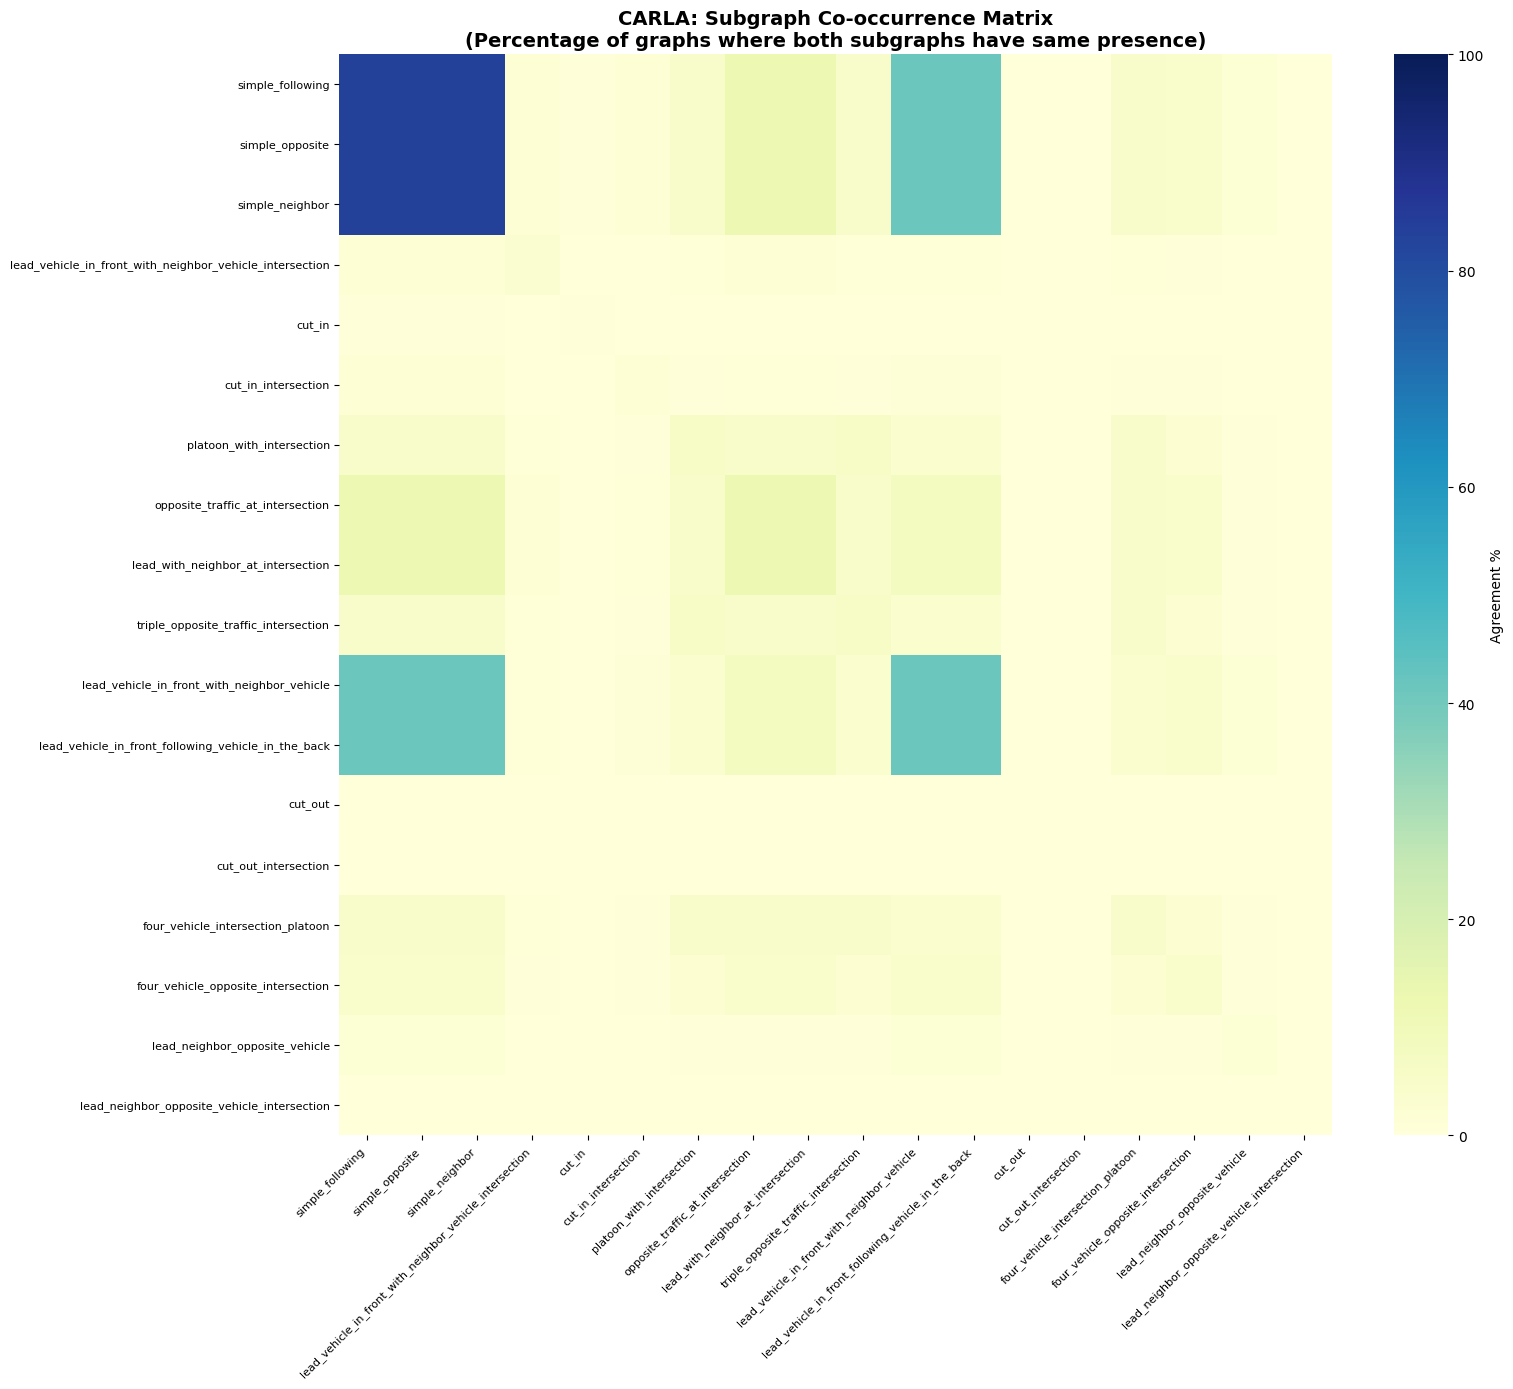

In [26]:
columns = list(coverage_graphs.keys())
n_cols = len(columns)
cooccurrence_matrix = np.zeros((n_cols, n_cols))

for i, col1 in enumerate(columns):
    for j, col2 in enumerate(columns):
        if i == j:
            cooccurrence_matrix[i, j] = cov_data_df_carla[col1].sum() / len(cov_data_df_carla) * 100
        else:
            cooccurrence = (cov_data_df_carla[col1] & cov_data_df_carla[col2]).sum() / len(cov_data_df_carla) * 100
            cooccurrence_matrix[i, j] = cooccurrence

cooccurrence_df_carla = pd.DataFrame(cooccurrence_matrix, index=columns, columns=columns)
agreement_df_carla = cooccurrence_df_carla
plt.figure(figsize=(16, 14))
sns.heatmap(agreement_df_carla, 
            annot=False,
            cmap='YlGnBu',
            vmin=0, 
            vmax=100,
            cbar_kws={'label': 'Agreement %'},
            xticklabels=True,
            yticklabels=True)
plt.title('CARLA: Subgraph Co-occurrence Matrix\n(Percentage of graphs where both subgraphs have same presence)', 
          fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.savefig(PLOTS_DIR / 'carla_agreement_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

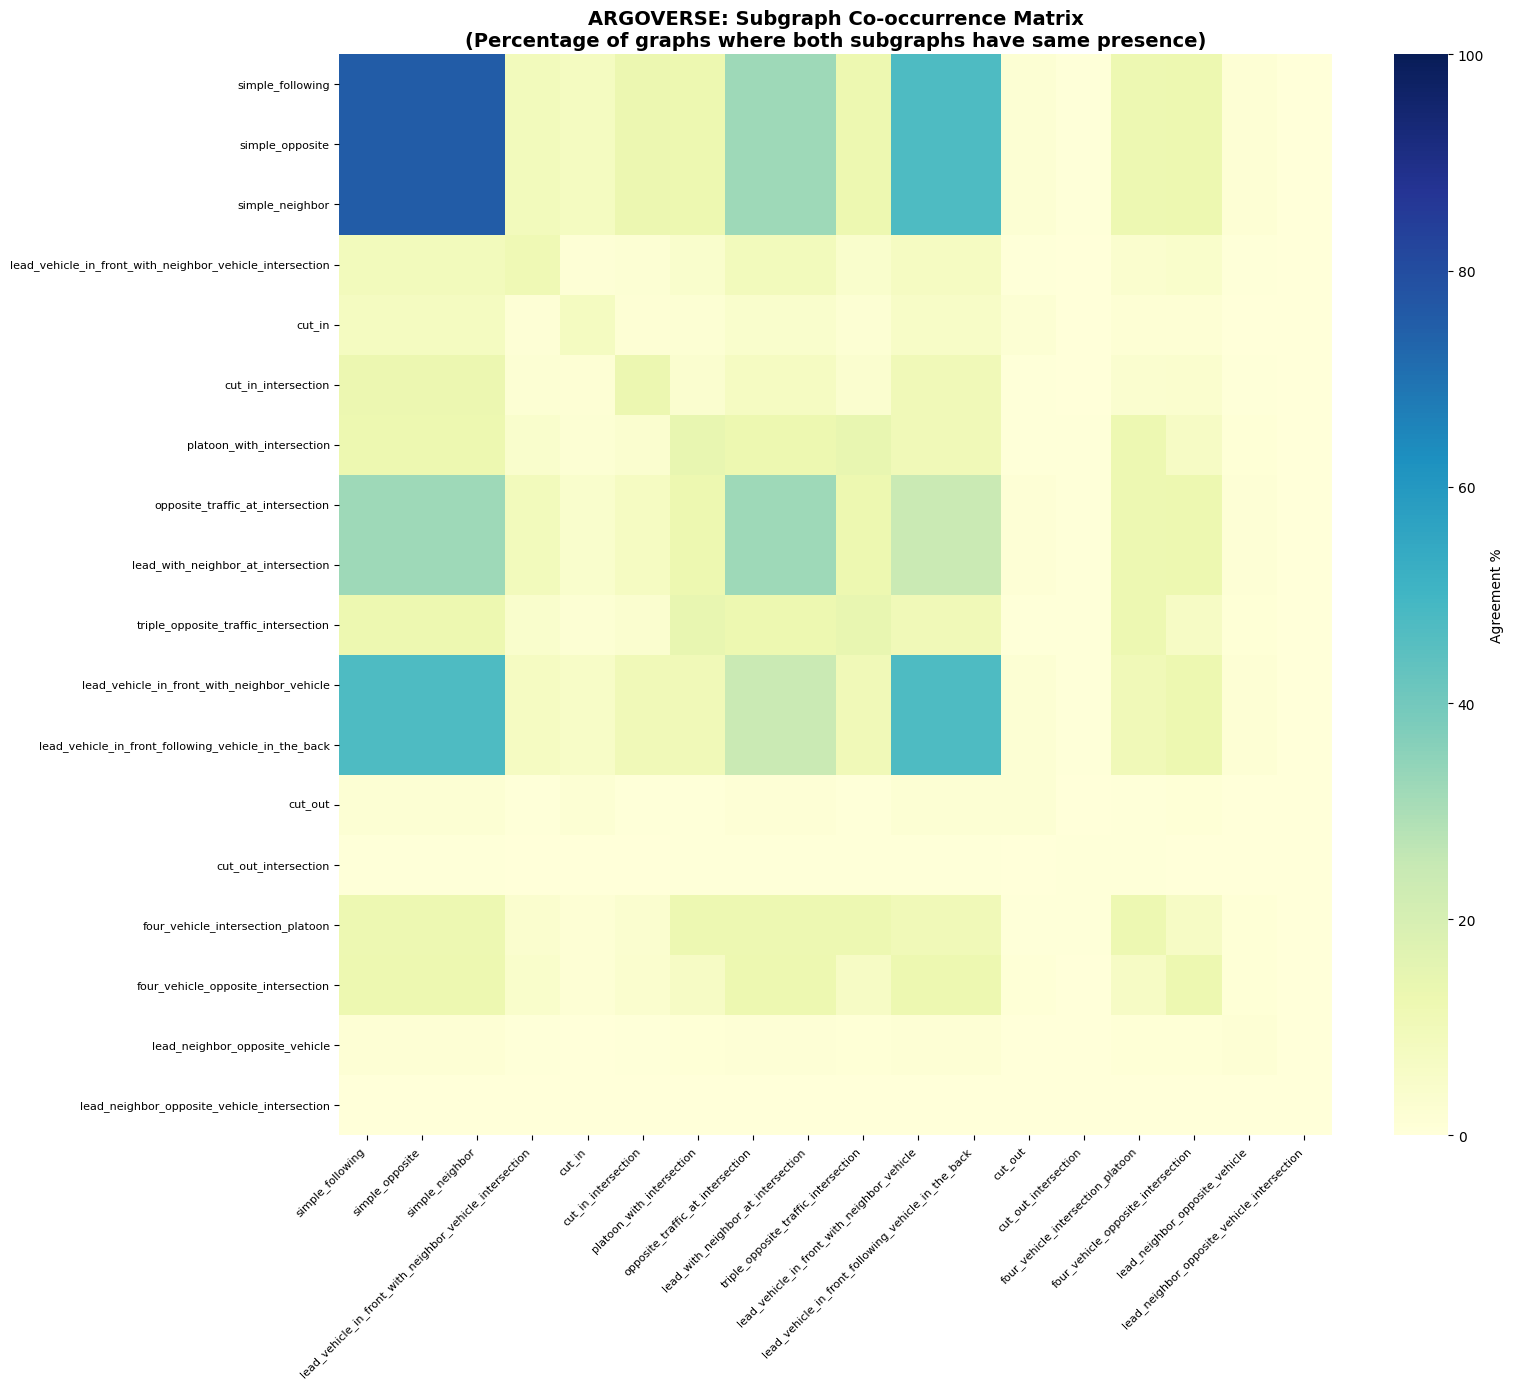

In [27]:
columns = list(coverage_graphs.keys())
n_cols = len(columns)
cooccurrence_matrix = np.zeros((n_cols, n_cols))

for i, col1 in enumerate(columns):
    for j, col2 in enumerate(columns):
        if i == j:
            cooccurrence_matrix[i, j] = cov_data_df_argo[col1].sum() / len(cov_data_df_argo) * 100
        else:
            cooccurrence = (cov_data_df_argo[col1] & cov_data_df_argo[col2]).sum() / len(cov_data_df_argo) * 100
            cooccurrence_matrix[i, j] = cooccurrence

cooccurrence_df_argo = pd.DataFrame(cooccurrence_matrix, index=columns, columns=columns)
agreement_df_argo = cooccurrence_df_argo
plt.figure(figsize=(16, 14))
sns.heatmap(agreement_df_argo, 
            annot=False,
            cmap='YlGnBu',
            vmin=0, 
            vmax=100,
            cbar_kws={'label': 'Agreement %'},
            xticklabels=True,
            yticklabels=True)
plt.title('ARGOVERSE: Subgraph Co-occurrence Matrix\n(Percentage of graphs where both subgraphs have same presence)', 
          fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.savefig(PLOTS_DIR / 'argo_agreement_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

## Co-occurrence Holes



In [28]:
def name_cooccurrence_hole(pattern1: str, pattern2: str) -> str:
    name_map = {
        'simple_2actor_overtaking': 'Overtaking',
        'simple_2actor_following': 'Following',
        'simple_2actor_merging': 'Merging',
        'simple_2actor_crossing': 'Crossing',
        'simple_2actor_oncoming': 'Oncoming',
        'complex_3actor_chain': '3-Chain',
        'complex_3actor_merge': '3-Merge',
        'complex_3actor_split': '3-Split',
        'complex_4actor_intersection': '4-Intersection',
        'complex_multilane_weave': 'Weave'
    }
    
    short1 = name_map.get(pattern1, pattern1.replace('simple_2actor_', '').replace('complex_', '').title())
    short2 = name_map.get(pattern2, pattern2.replace('simple_2actor_', '').replace('complex_', '').title())
    
    return f"{short1} + {short2}"

argo_high_threshold = 10.0
carla_low_threshold = 2.0

carla_cooccurrence_holes = []

for i in range(len(agreement_df_carla)):
    for j in range(i+1, len(agreement_df_carla)):
        argo_val = agreement_df_argo.iloc[i, j]
        carla_val = agreement_df_carla.iloc[i, j]
        
        if argo_val >= argo_high_threshold and carla_val < carla_low_threshold:
            pattern1 = agreement_df_carla.index[i]
            pattern2 = agreement_df_carla.columns[j]
            carla_cooccurrence_holes.append({
                'name': name_cooccurrence_hole(pattern1, pattern2),
                'pattern1': pattern1,
                'pattern2': pattern2,
                'argoverse_cooccurrence': argo_val,
                'carla_cooccurrence': carla_val,
                'difference': argo_val - carla_val
            })

carla_cooccurrence_holes_df = pd.DataFrame(carla_cooccurrence_holes).sort_values('difference', ascending=False) if len(carla_cooccurrence_holes) > 0 else pd.DataFrame(carla_cooccurrence_holes)

argo_cooccurrence_holes = []

for i in range(len(agreement_df_carla)):
    for j in range(i+1, len(agreement_df_carla)):
        carla_val = agreement_df_carla.iloc[i, j]
        argo_val = agreement_df_argo.iloc[i, j]
        
        if carla_val >= argo_high_threshold and argo_val < carla_low_threshold:
            pattern1 = agreement_df_carla.index[i]
            pattern2 = agreement_df_carla.columns[j]
            argo_cooccurrence_holes.append({
                'name': name_cooccurrence_hole(pattern1, pattern2),
                'pattern1': pattern1,
                'pattern2': pattern2,
                'carla_cooccurrence': carla_val,
                'argoverse_cooccurrence': argo_val,
                'difference': carla_val - argo_val
            })

argo_cooccurrence_holes_df = pd.DataFrame(argo_cooccurrence_holes).sort_values('difference', ascending=False) if len(argo_cooccurrence_holes) > 0 else pd.DataFrame(argo_cooccurrence_holes)

subgraph_holes_data = []

for _, hole_row in comparison_df[comparison_df['hole_in_carla']].iterrows():
    scenario_name = hole_row['subgraph']
    argo_graphs_with_scenario = cov_data_df_argo[cov_data_df_argo[scenario_name] == True]['path'].tolist()
    
    for graph_path in argo_graphs_with_scenario:
        subgraph_holes_data.append({
            'scenario': scenario_name,
            'argoverse_graph_path': graph_path,
            'argo_absolute_count': hole_row['absolute_count_argo'],
            'argo_relative_percentage': hole_row['relative_percentage_argo'],
            'carla_absolute_count': hole_row['absolute_count_carla'],
            'carla_relative_percentage': hole_row['relative_percentage_carla'],
            'coverage_gap': hole_row['abs_diff']
        })

subgraph_holes_df = pd.DataFrame(subgraph_holes_data)
if len(subgraph_holes_df) > 0:
    subgraph_holes_df.to_csv(COVERAGE_HOLES_DIR / 'carla_subgraph_holes.csv', index=False)

cooccurrence_holes_data = []

for _, hole_row in carla_cooccurrence_holes_df.iterrows():
    pattern1 = hole_row['pattern1']
    pattern2 = hole_row['pattern2']
    
    argo_graphs_with_both = cov_data_df_argo[
        (cov_data_df_argo[pattern1] == True) & 
        (cov_data_df_argo[pattern2] == True)
    ]['path'].tolist()
    
    for graph_path in argo_graphs_with_both:
        cooccurrence_holes_data.append({
            'combination_name': hole_row['name'],
            'pattern1': pattern1,
            'pattern2': pattern2,
            'argoverse_graph_path': graph_path,
            'argo_cooccurrence_rate': hole_row['argoverse_cooccurrence'],
            'carla_cooccurrence_rate': hole_row['carla_cooccurrence'],
            'cooccurrence_gap': hole_row['difference']
        })

cooccurrence_holes_df_export = pd.DataFrame(cooccurrence_holes_data)
if len(cooccurrence_holes_df_export) > 0:
    cooccurrence_holes_df_export.to_csv(COVERAGE_HOLES_DIR / 'carla_cooccurrence_holes.csv', index=False)


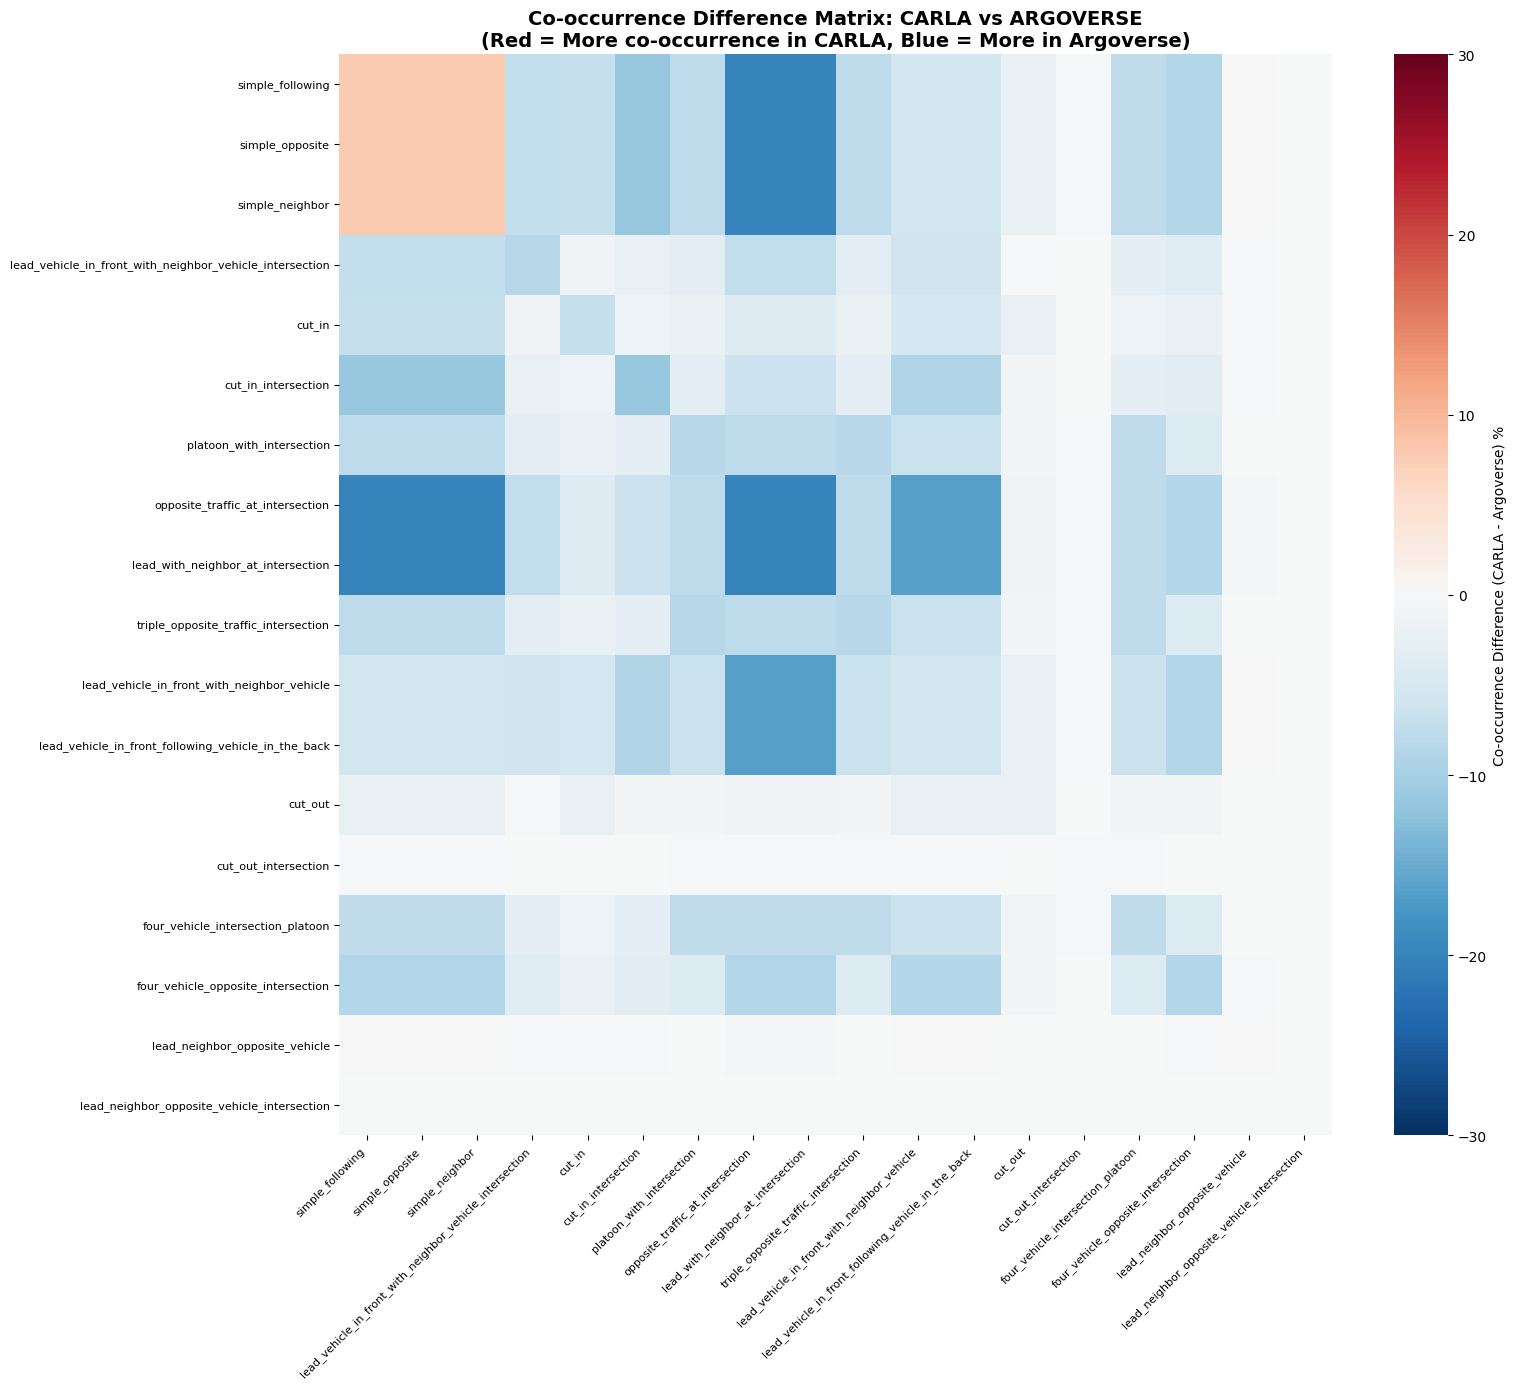

In [29]:

cooccurrence_diff = agreement_df_carla - agreement_df_argo

fig, ax = plt.subplots(figsize=(16, 14))
sns.heatmap(cooccurrence_diff, 
            cmap='RdBu_r', 
            center=0, 
            vmin=-30, 
            vmax=30,
            cbar_kws={'label': 'Co-occurrence Difference (CARLA - Argoverse) %'},
            xticklabels=True,
            yticklabels=True,
            ax=ax)

ax.set_title('Co-occurrence Difference Matrix: CARLA vs ARGOVERSE\n' + 
             '(Red = More co-occurrence in CARLA, Blue = More in Argoverse)', 
             fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.savefig(PLOTS_DIR / 'cooccurrence_difference_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
